In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings

warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv('/kaggle/input/diwali-sales/Diwali Sales Data.csv',encoding='latin1')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [4]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [5]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(11239, 13)

In [8]:
df['Amount']=df['Amount'].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


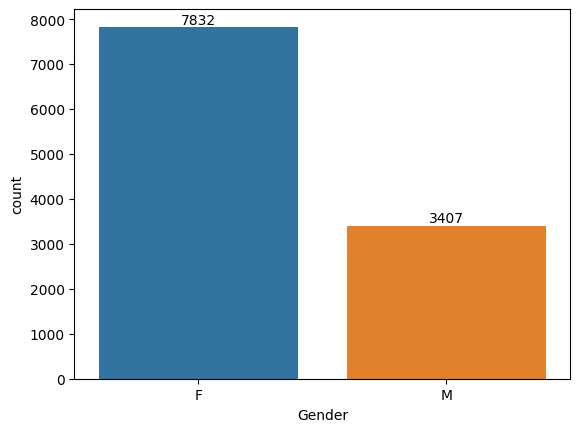

In [10]:
#EDA
ax=sns.countplot(x='Gender', data=df)

for bar in ax.containers:
    ax.bar_label(bar)

In [11]:
group_by_Gender=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
group_by_Gender


,Gender,Amount
0,F,74335853
1,M,31913276


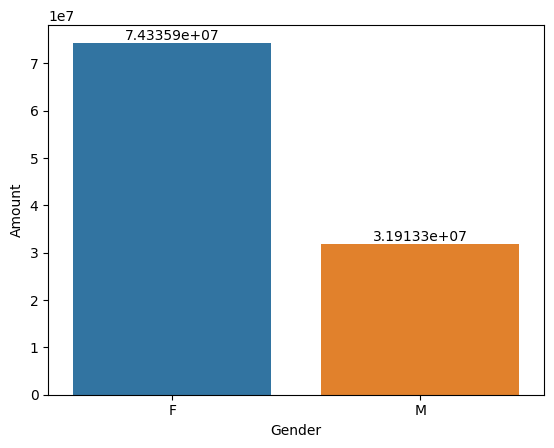

In [12]:
p=sns.barplot(x='Gender',y='Amount',data=group_by_Gender)


for bars in p.containers:
    p.bar_label(bars)

**From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than males.**

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

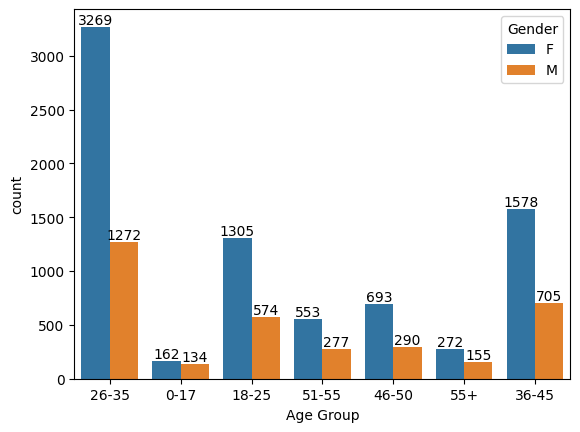

In [14]:
p2=sns.countplot(data=df,x='Age Group',hue='Gender')

for  bar in p2.containers:
    p2.bar_label(bar)



In [15]:
#total amount vs age group

sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

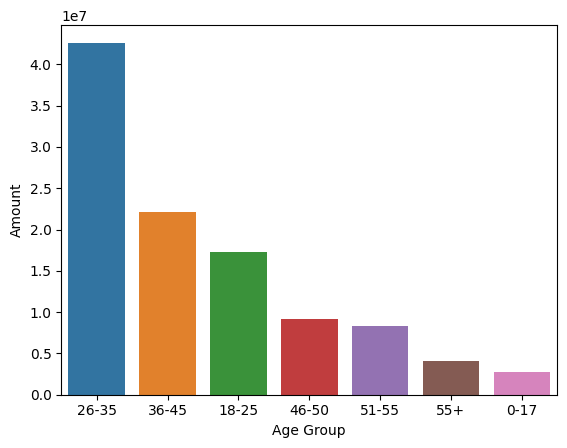

In [16]:
p3=sns.barplot(x='Age Group',y='Amount',data=sales_age)


**From above graphs we can see that most oof the buyers are of age group between 26-35 yrs female**

In [17]:
df.columns


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

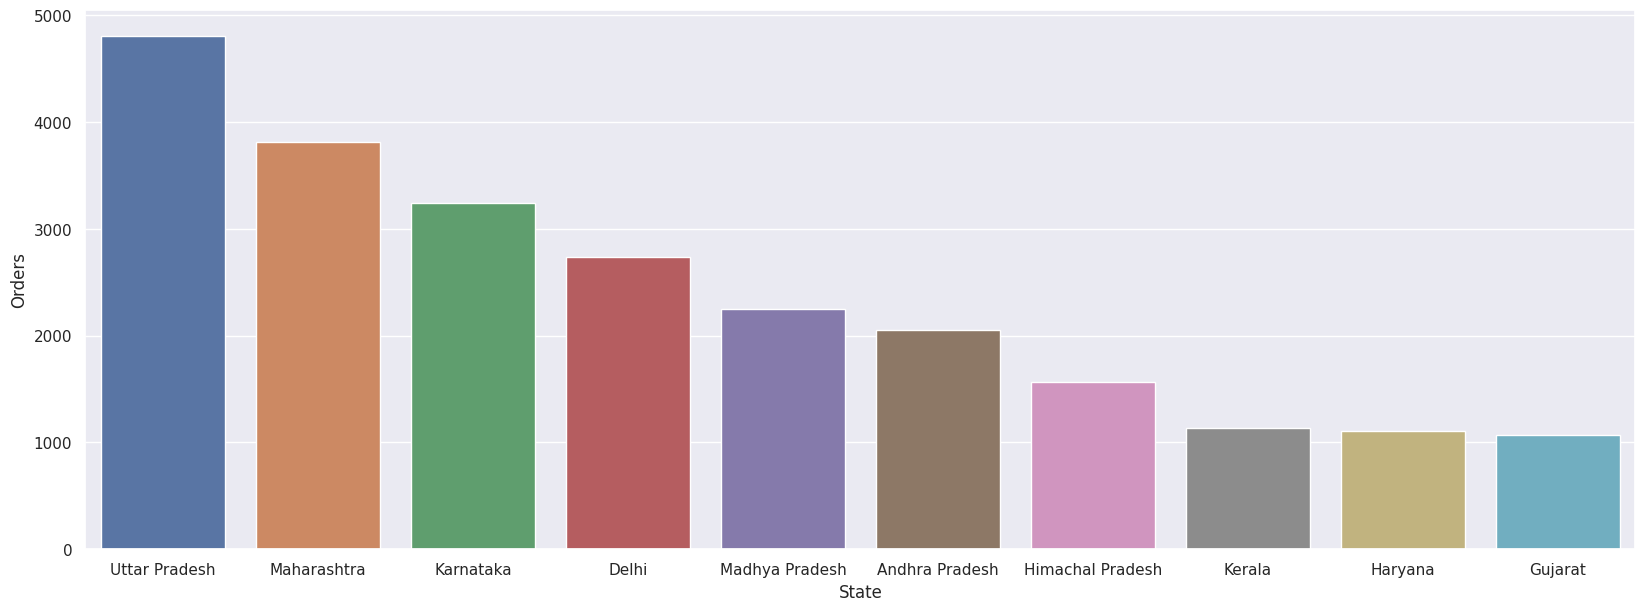

In [18]:
#total number of orders from top 10 states
sales_state=df.groupby('State',as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(x='State',y='Orders',data=sales_state)


<Axes: xlabel='State', ylabel='Amount'>

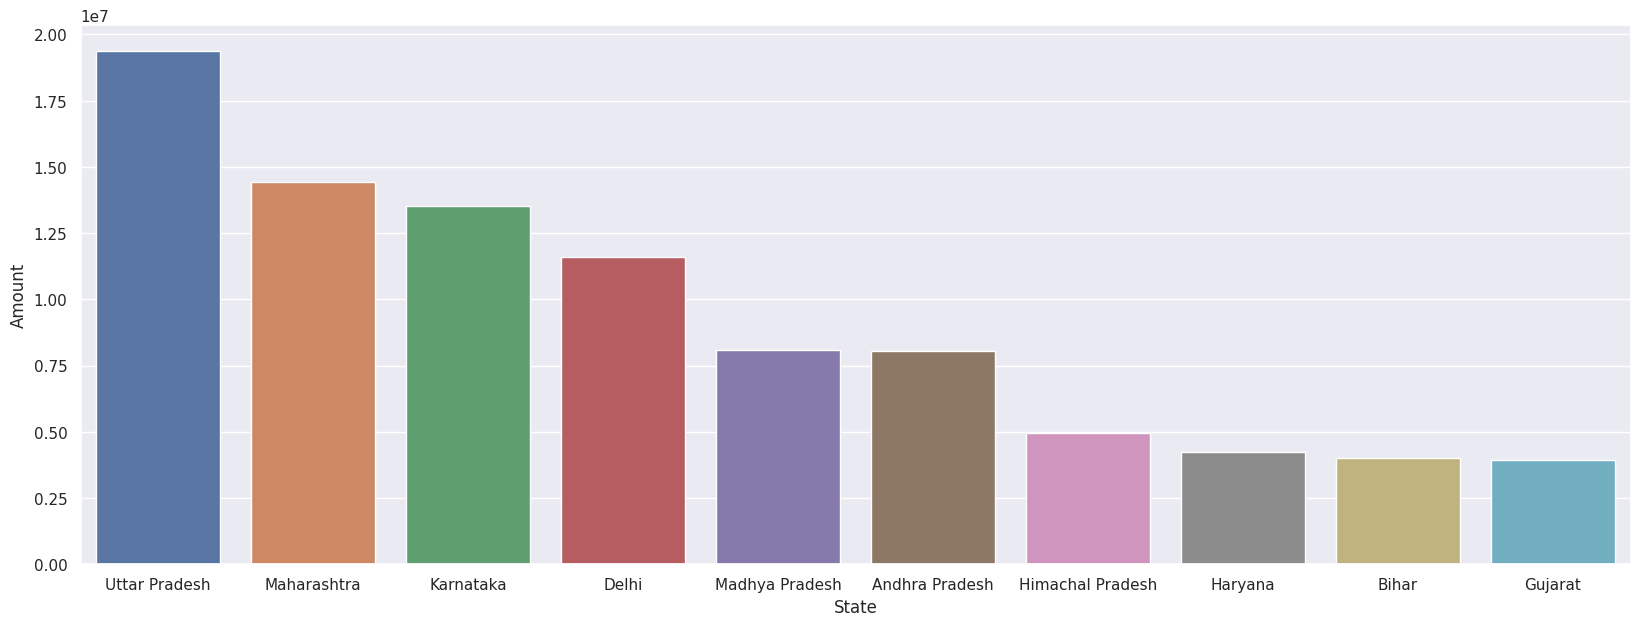

In [19]:
sales_state=df.groupby('State',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(x='State',y='Amount',data=sales_state)

**From above graphs we can see that most of the orders and total sales/amount are from Uttar Pradesh,Maharashtra and Karnataka respectively.**

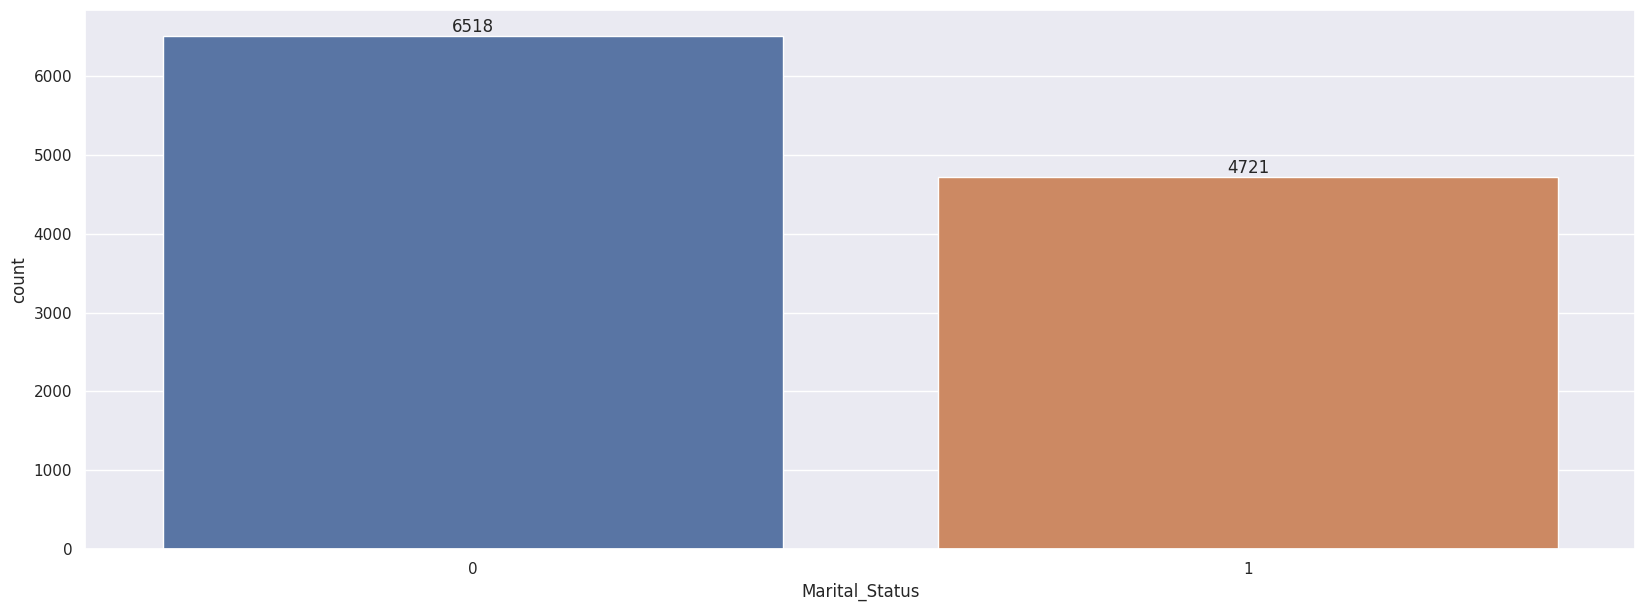

In [20]:
p4=sns.countplot(x='Marital_Status',data=df)
sns.set(rc={'figure.figsize':(7,5)})

for  bar in p4.containers:
    p4.bar_label(bar)


In [21]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Marital_Status', ylabel='Amount'>

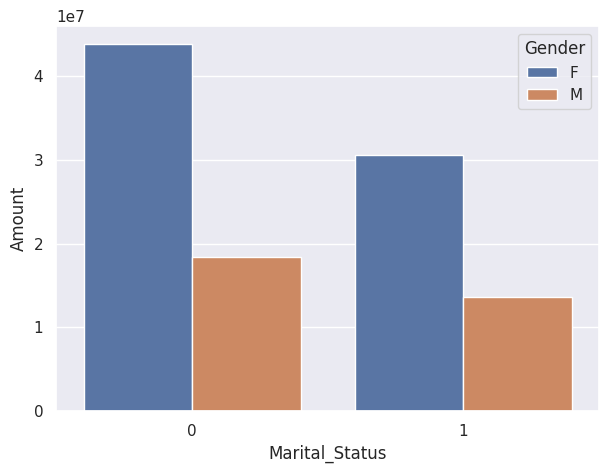

In [22]:
Marital_Status=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Marital_Status',y='Amount',data=Marital_Status,hue='Gender')

****From above graphs we can see that most of the buyers are married(women) and they have high purchasing power.****

In [23]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

**Occupation**

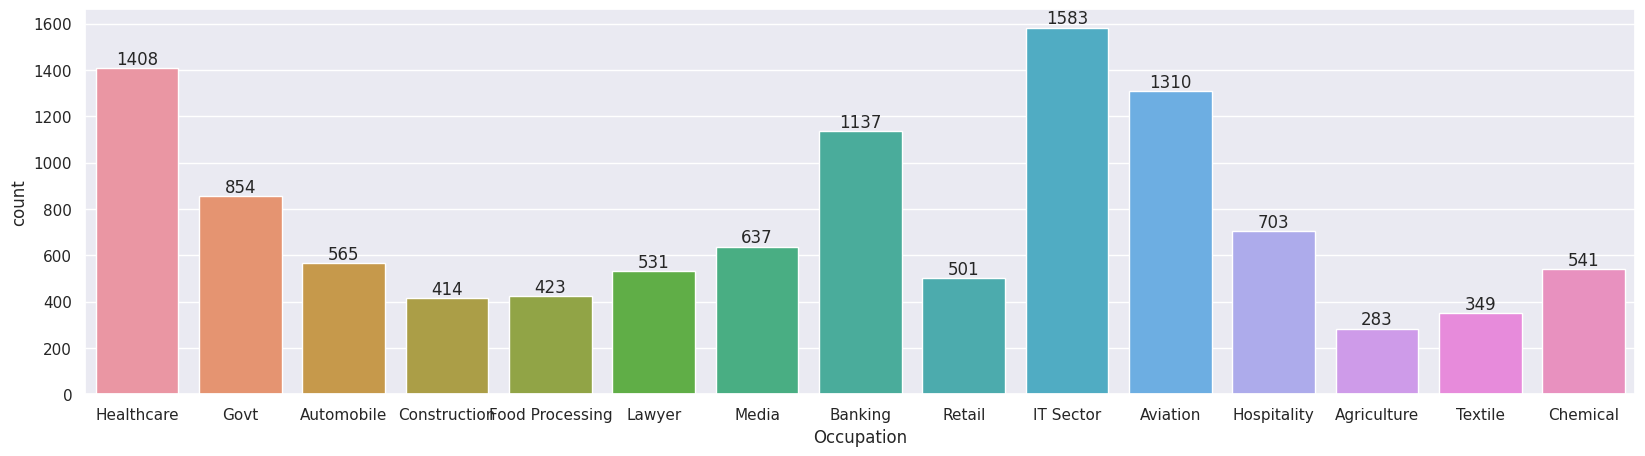

In [24]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(x='Occupation',data=df)

for bar in ax.containers:
    ax.bar_label(bar)




<Axes: xlabel='Occupation', ylabel='Amount'>

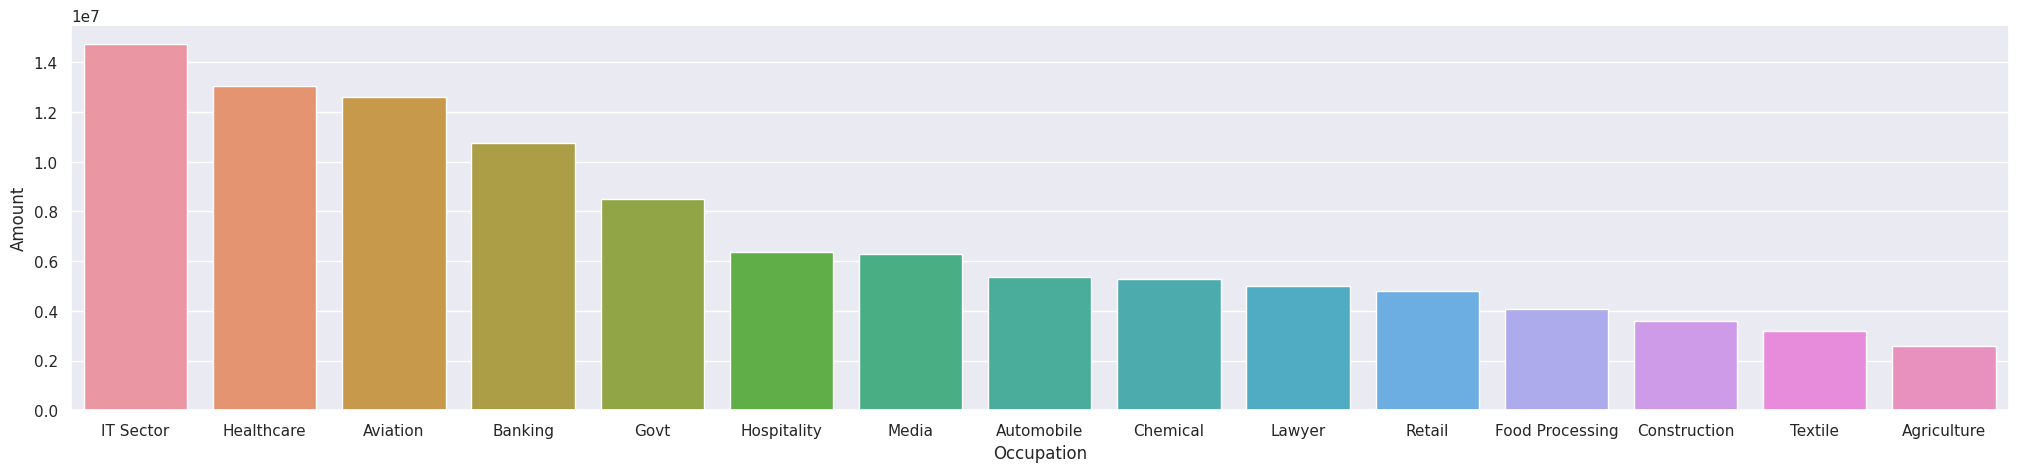

In [25]:
Occupation=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x='Occupation',y='Amount',data=Occupation)

**From above graphs we can see that most of the buyers are working in IT sector,Healthcare and Aviation**

**Product_Category**

In [26]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

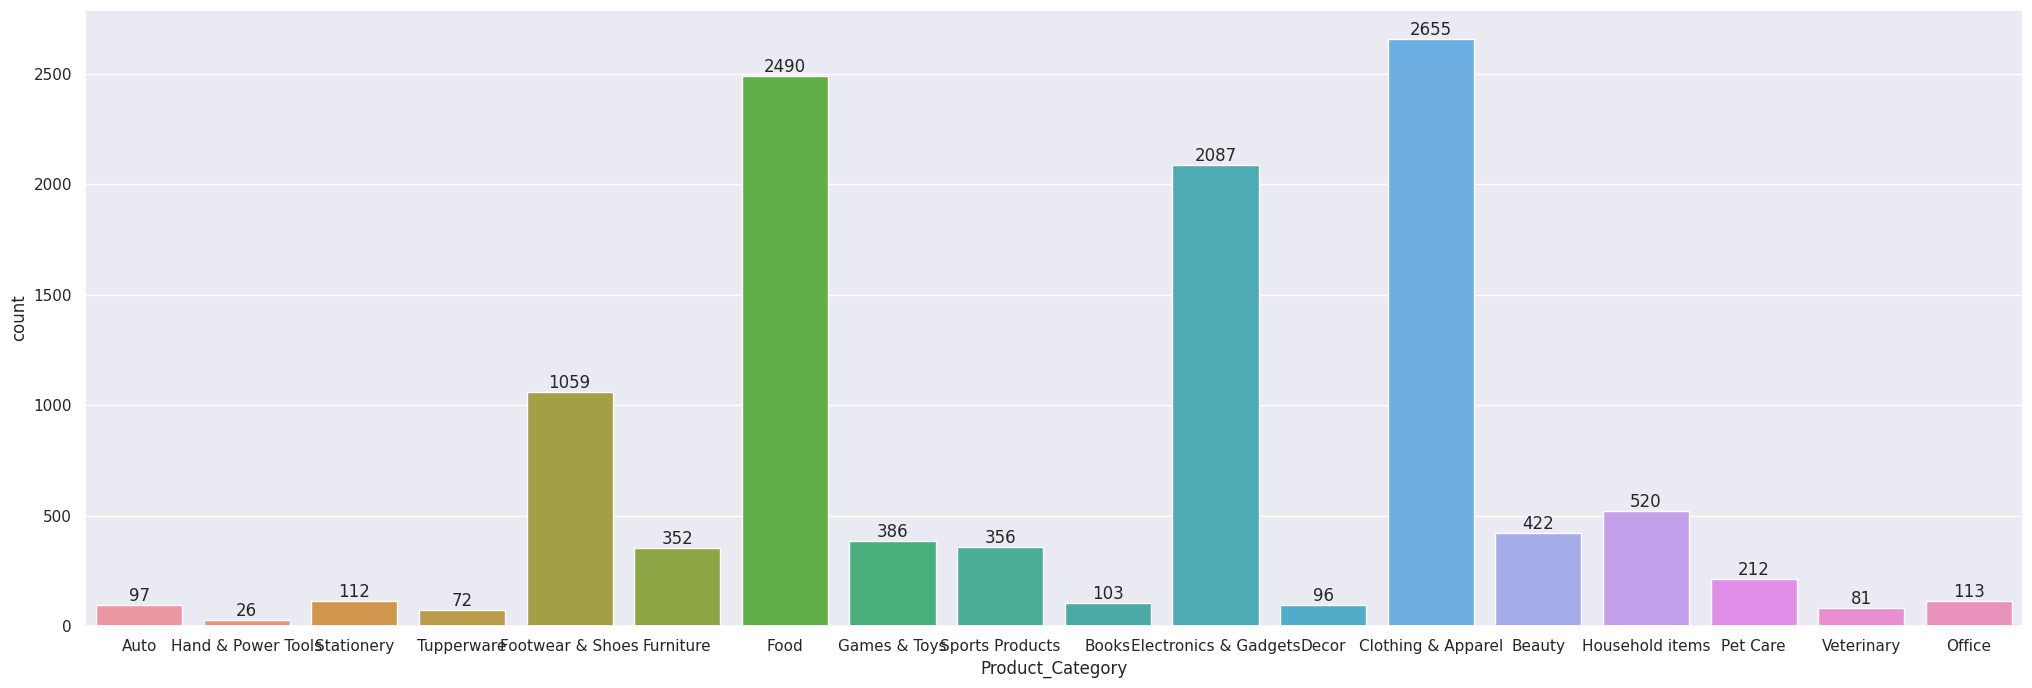

In [27]:
sns.set(rc={'figure.figsize':(25,8)})
ax=sns.countplot(x='Product_Category',data=df)

for bar in ax.containers:
    ax.bar_label(bar)


<Axes: xlabel='Product_Category', ylabel='Amount'>

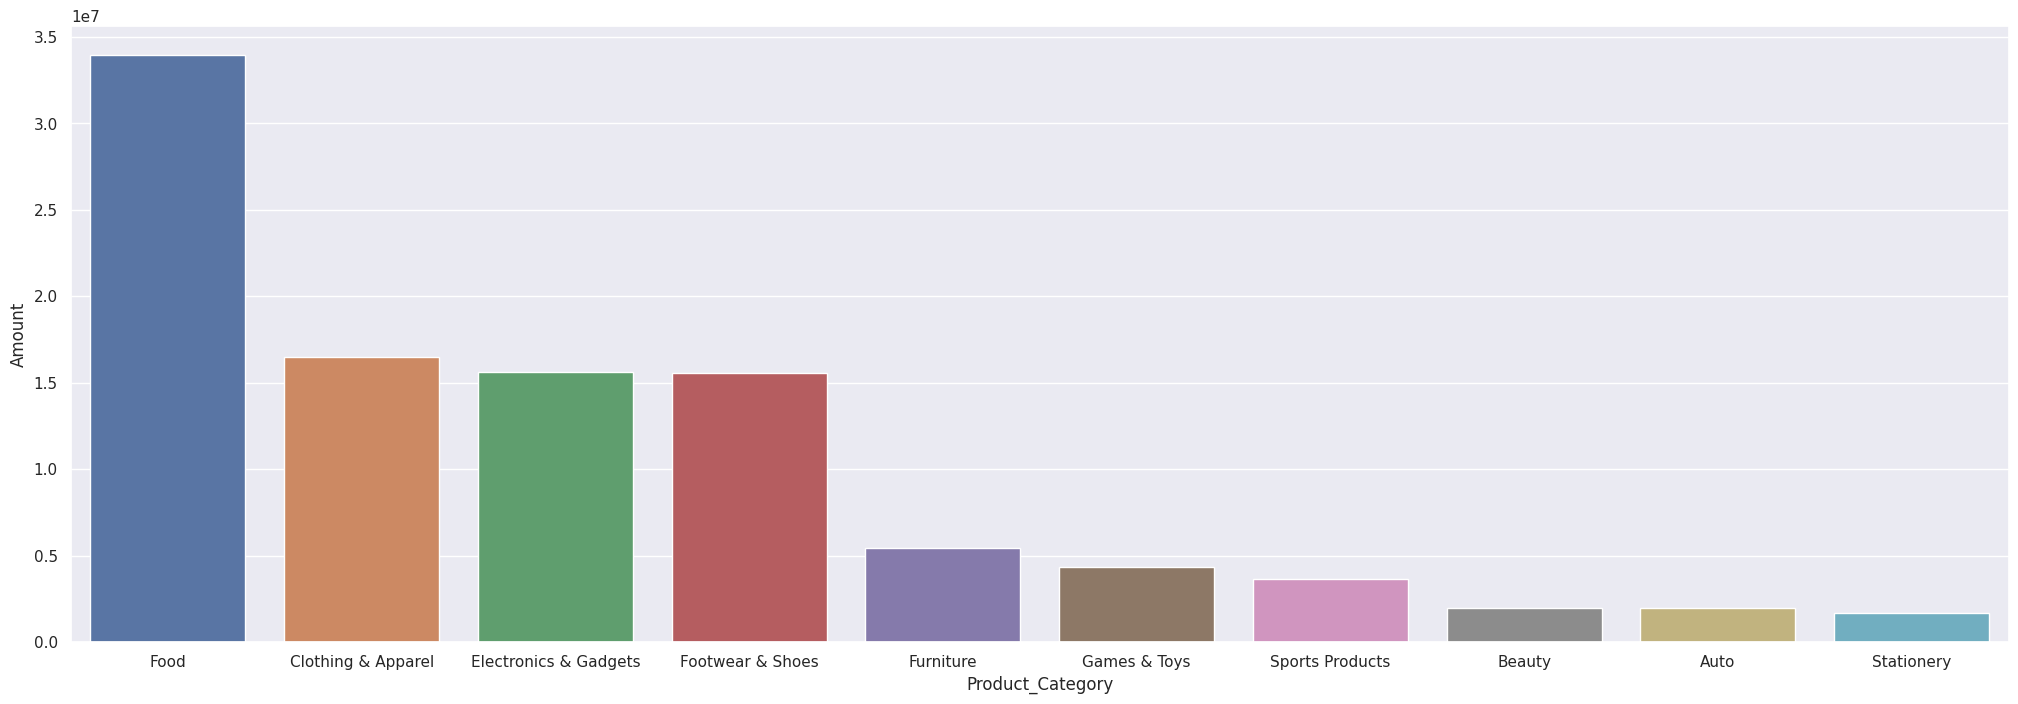

In [28]:
Product_Category=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
#sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x='Product_Category',y='Amount',data=Product_Category)

**From above graphs we can see that most of the sold products are Food, Clothing and Electronics.**

In [29]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Product_ID', ylabel='Orders'>

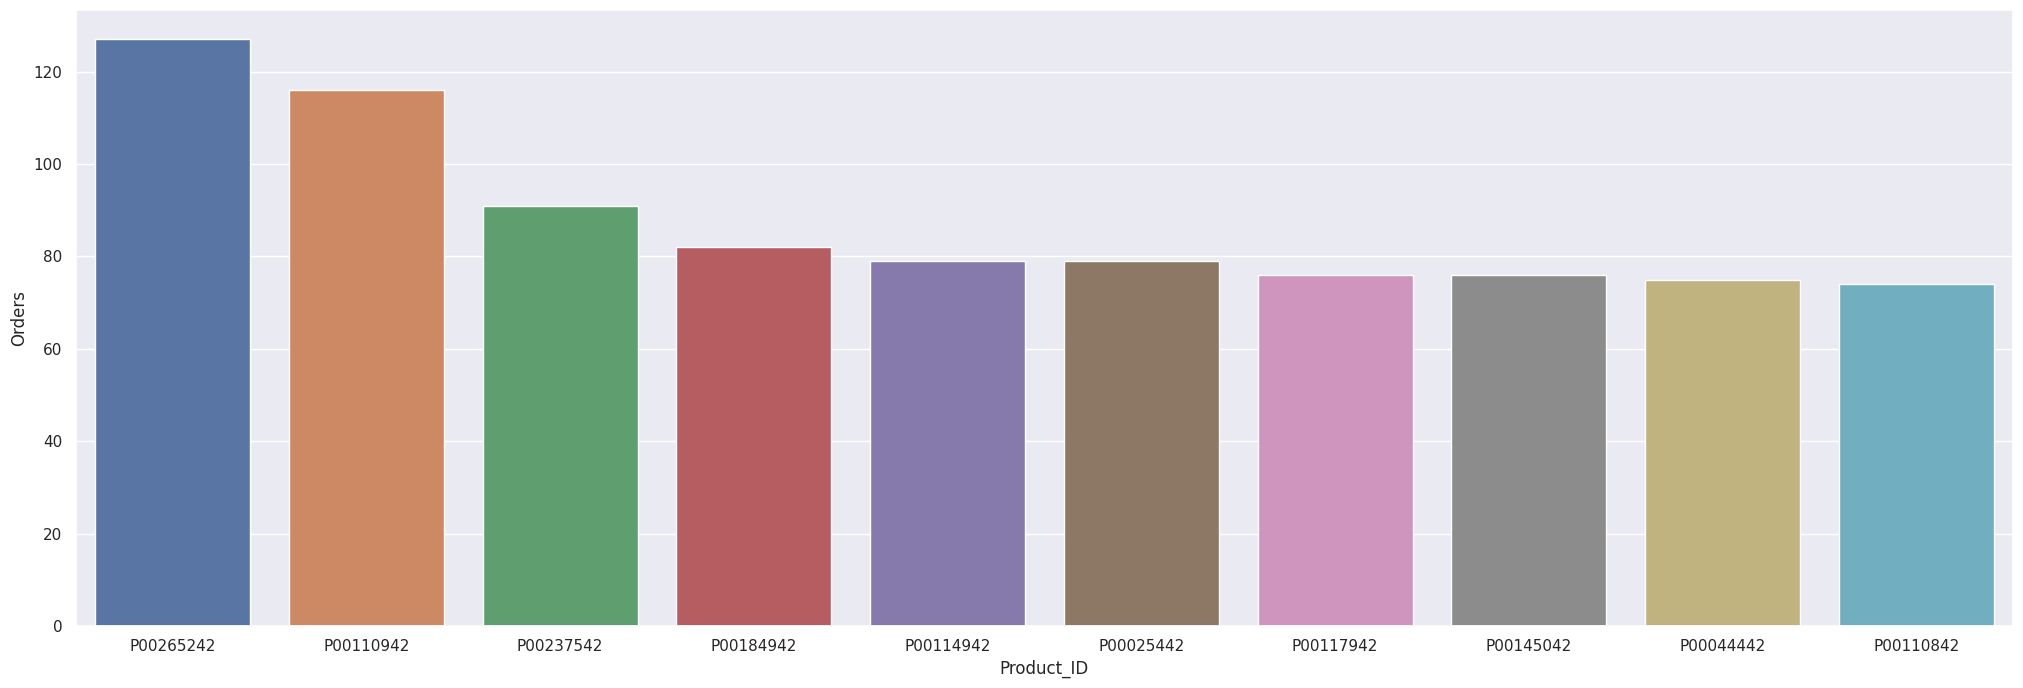

In [30]:
orders=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
#sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x='Product_ID',y='Orders',data=orders)

**CONCLUSION:**

**Married women age group 26-35 yrs from UP, Maharastra and karnataka working in IT,Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.**